In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import sklearn

For this notebook to work, you need to have scikit-learn version 1.0 or above. Run the cell below to check the version you have installed. If it is less than 1.0, make sure you install the new version before continuing by going to the command line and using the command `conda install scikit-learn=1.0`

In [3]:
print(sklearn.__version__)

1.3.2


# Regression Tree Parameters

In this notebook you will explore how model parameters can affect the quality of prediction. 

First we create the dataset. 

In [23]:
np.random.seed(234) # do not change the random seed

x = np.random.uniform(0, 10, (10, 1))

def true_function(x):
    return -(1.4 - 3.0 * x) * np.sin(x)

y = true_function(x)

**To Do** vary the hyperparameters of the regression trees below to create the best and worst regression trees you can. Upload your image in insendi. Which parameters matter the most? Which ones matter the least? 

Use the `help(DecisionTreeRegressor)` function to see what the options for the hyperparameter values are. 

In [24]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [25]:
x_test = np.linspace(0, 10, 100).reshape(100, 1)

In [26]:
clf_worst = DecisionTreeRegressor(criterion="absolute_error",
                            splitter='random', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features=1, 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

print(clf_worst.criterion)

clf_worst.fit(x, y)

clf_best = DecisionTreeRegressor(criterion='squared_error',
                            splitter='best', 
                            max_depth=3, 
                            min_samples_split=2,
                            min_samples_leaf=3, 
                            min_weight_fraction_leaf=0.2, 
                            max_features='sqrt', 
                            max_leaf_nodes=2,
                            min_impurity_decrease=1.0)

clf_best.fit(x, y)

y_test_worst = clf_worst.predict(x_test)
y_test_best = clf_best.predict(x_test)
y_true = true_function(x_test)

absolute_error


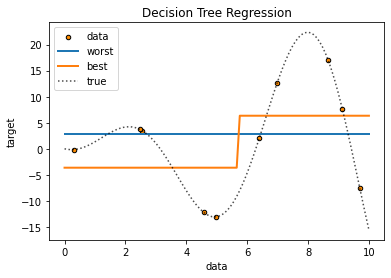

In [27]:
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_test_worst,  linewidth=2, label='worst')
plt.plot(x_test, y_test_best, linewidth=2, label='best')
plt.plot(x_test, y_true, color='k', linestyle=":", alpha=0.7, label='true')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()